## Importing Essential Libraries

In [13]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

#dataset import
dataset = pd.read_csv('data.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


## Enhance Data

In [14]:
dataset['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [15]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:36].values
y = dataset.iloc[:,36:37].values
y[10:40]
print(X.shape)
print(y.shape)

(4424, 36)
(4424, 1)


In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors = 15)
X, y = smote.fit_resample(X, y)

In [17]:
unique = np.unique(y, return_counts = True)
unique
# (array(['Dropout', 'Enrolled', 'Graduate'], dtype=object),
# array([2209, 2209, 2209], dtype=int64))

(array(['Dropout', 'Enrolled', 'Graduate'], dtype=object),
 array([2209, 2209, 2209], dtype=int64))

## One - hot Encoder

In [18]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y[10:40]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

## Normalize Data

In [19]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.1)

In [21]:
print(X_train.shape)
print(y_train.shape)

(5964, 36)
(5964, 3)


## Build model

In [22]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Neural network
model = Sequential()
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 3, activation = 'softmax'))

In [23]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Train model

In [24]:
history = model.fit(X_train, y_train, epochs = 400, validation_data = (X_test, y_test), batch_size = 50)

Epoch 1/400
120/120 [==============================] - 3s 21ms/step - loss: 0.7402 - accuracy: 0.6715 - val_loss: 0.6519 - val_accuracy: 0.7345
Epoch 2/400
120/120 [==============================] - 3s 22ms/step - loss: 0.6206 - accuracy: 0.7466 - val_loss: 0.5899 - val_accuracy: 0.7511
Epoch 3/400
120/120 [==============================] - 3s 25ms/step - loss: 0.5612 - accuracy: 0.7671 - val_loss: 0.5428 - val_accuracy: 0.8054
Epoch 4/400
120/120 [==============================] - 3s 21ms/step - loss: 0.5258 - accuracy: 0.7862 - val_loss: 0.5484 - val_accuracy: 0.7813
Epoch 5/400
120/120 [==============================] - 2s 19ms/step - loss: 0.4983 - accuracy: 0.7995 - val_loss: 0.5187 - val_accuracy: 0.7934
Epoch 6/400
120/120 [==============================] - 2s 19ms/step - loss: 0.4600 - accuracy: 0.8124 - val_loss: 0.5706 - val_accuracy: 0.7888
Epoch 7/400
120/120 [==============================] - 2s 19ms/step - loss: 0.4346 - accuracy: 0.8273 - val_loss: 0.5214 - val_accuracy:

## Load model

In [25]:
from tensorflow.keras.models import load_model

In [26]:
model.save('predict_model.h5')

In [27]:
later_model = load_model('predict_model.h5')

In [28]:
losses = pd.DataFrame(model.history.history)

## Evaluate model

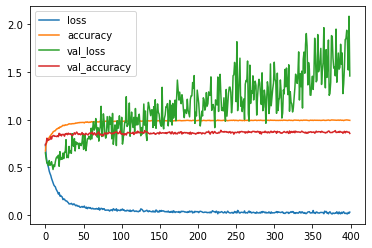

In [29]:
losses.plot()
plt.savefig('losses.png')

In [30]:
import random
random.seed(87)
random_ind = random.randint(0, len(dataset))

new_student = dataset.drop('Target',axis = 1).iloc[random_ind]
new_student

Marital status                                       1.000000
Application mode                                    17.000000
Application order                                    1.000000
Course                                            9853.000000
Daytime/evening attendance                           1.000000
Previous qualification                               1.000000
Previous qualification (grade)                     125.000000
Nacionality                                          1.000000
Mother's qualification                              19.000000
Father's qualification                              19.000000
Mother's occupation                                  4.000000
Father's occupation                                  7.000000
Admission grade                                    128.500000
Displaced                                            1.000000
Educational special needs                            0.000000
Debtor                                               0.000000
Tuition 

In [31]:
(model.predict(new_student.values.reshape(1,36)) > 0.5).astype("int32")

1/1 [==============================] - 0s 107ms/step


array([[1, 0, 0]])

In [32]:
dataset.iloc[random_ind]['Target']

'Enrolled'

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

21/21 [==============================] - 0s 4ms/step


In [35]:
print('Accuracy Score:', accuracy_score(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

Accuracy Score: 0.8552036199095022


              precision    recall  f1-score   support

           0       0.91      0.81      0.86       221
           1       0.80      0.92      0.86       211
           2       0.89      0.84      0.86       231

   micro avg       0.86      0.86      0.86       663
   macro avg       0.87      0.86      0.86       663
weighted avg       0.87      0.86      0.86       663
 samples avg       0.86      0.86      0.86       663



c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
